# Non-parametric Statistics 
## Chapter 2: Kernel Density Estimation
### Introduction

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from scipy import stats

In [101]:
# this code should work for anyone who cloned the project via github
# as it ensures that you have the correct project structure
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, "..", ".."))
plots_folder = os.path.join(project_root, "plots/chap2/motivation")

# Please check this is correct path, hopefully it works fine
plots_folder

'/Users/wuzm/UOEY4S2/nonparam-stats-proj/plots/chap2/motivation'

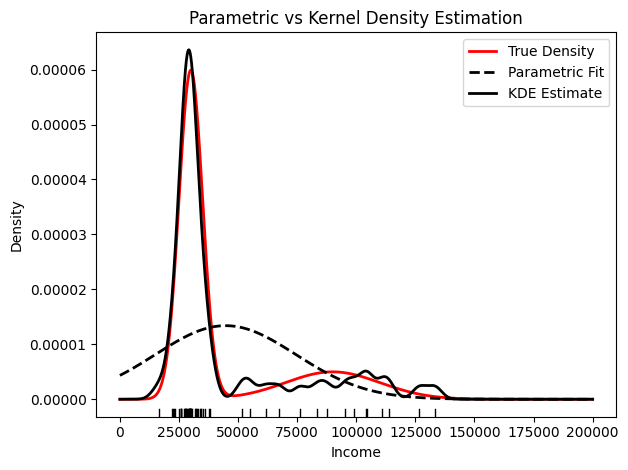

In [107]:
np.random.seed(46)

# synthetic income data with a long-tail distribution 
income_data = np.concatenate([np.random.normal(30000, 5000, 45),
                              np.random.normal(90000, 20000, 15)])
income_data = income_data.reshape(-1, 1)

# Parametric approach
mean, std = norm.fit(income_data)

true_income_range = np.linspace(0, 200000, 10000)
true_density = 0.75 * norm.pdf(true_income_range, 30000, 5000) + 0.25 * norm.pdf(true_income_range, 90000, 20000)

parametric_density = norm.pdf(true_income_range, mean, std)

# KDE approach 
kde = KernelDensity(kernel='gaussian', bandwidth=3000).fit(income_data)
kde_val = np.exp(kde.score_samples(true_income_range.reshape(-1, 1)))

# Plotting 
#fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

plt.plot(true_income_range, true_density, 'r-', linewidth=2, label='True Density')
plt.plot(true_income_range, parametric_density, 'k--', linewidth=2, label='Parametric Fit')
plt.plot(true_income_range, kde_val, 'k-', linewidth=2, label='KDE Estimate')

for datapoint in income_data:
    plt.axvline(datapoint, ymin=0, ymax=0.02, color='k', linewidth=1)
plt.title('Parametric vs Kernel Density Estimation')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.savefig(os.path.join(plots_folder, 'param-vs-non-param-kde.png'))
plt.show()






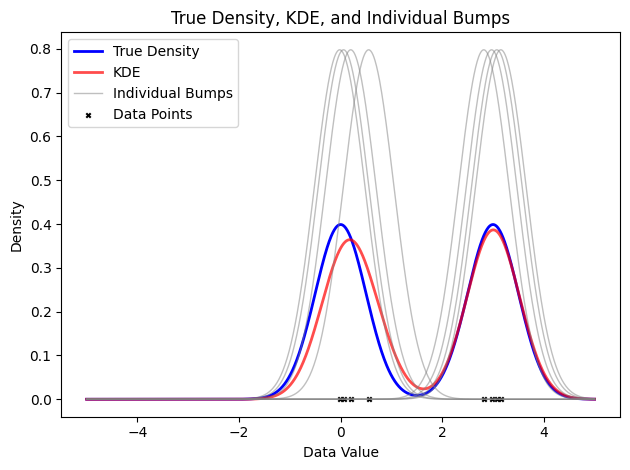

In [87]:
data_points = np.concatenate([np.random.normal(0, 0.5, 4),
                              np.random.normal(3, 0.5, 4)])
x_values = np.linspace(-5, 5, 1000)

true_density = 0.5*norm.pdf(x_values, 0, 0.5) + 0.5*norm.pdf(x_values, 3, 0.5)

bandwidth = 0.5

# Calculate the KDE by summing the Gaussian bumps
kde = np.sum([norm.pdf(x_values, point, bandwidth) for point in data_points], axis=0) / len(data_points)

# Plot true density
plt.plot(x_values, true_density, label='True Density', linewidth=2, color='blue')
# plot KDE
plt.plot(x_values, kde, label='KDE', linewidth=2, color='red', alpha=0.7)

# Plot individual bumps 
for i, point in enumerate(data_points):
    bump = norm.pdf(x_values, point, bandwidth)
    plt.plot(x_values, bump, color='gray', linewidth=1, alpha=0.5, label='Individual Bumps' if i == 0 else None)

# Plot data points
plt.scatter(data_points, np.zeros(len(data_points)), color='k', marker="x", s=10, alpha=1, label='Data Points')

plt.title('True Density, KDE, and Individual Bumps')
plt.xlabel('Data Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(plots_folder, 'kernel-kde.png'))
plt.show()




/var/folders/72/czpkdkzd62bbvhzjzt68qnlw0000gn/T/ipykernel_30148/1055537348.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  axs[i].plot(x_values, kde, 'r-', label='KDE', linewidth=2, color='red', alpha=0.7)


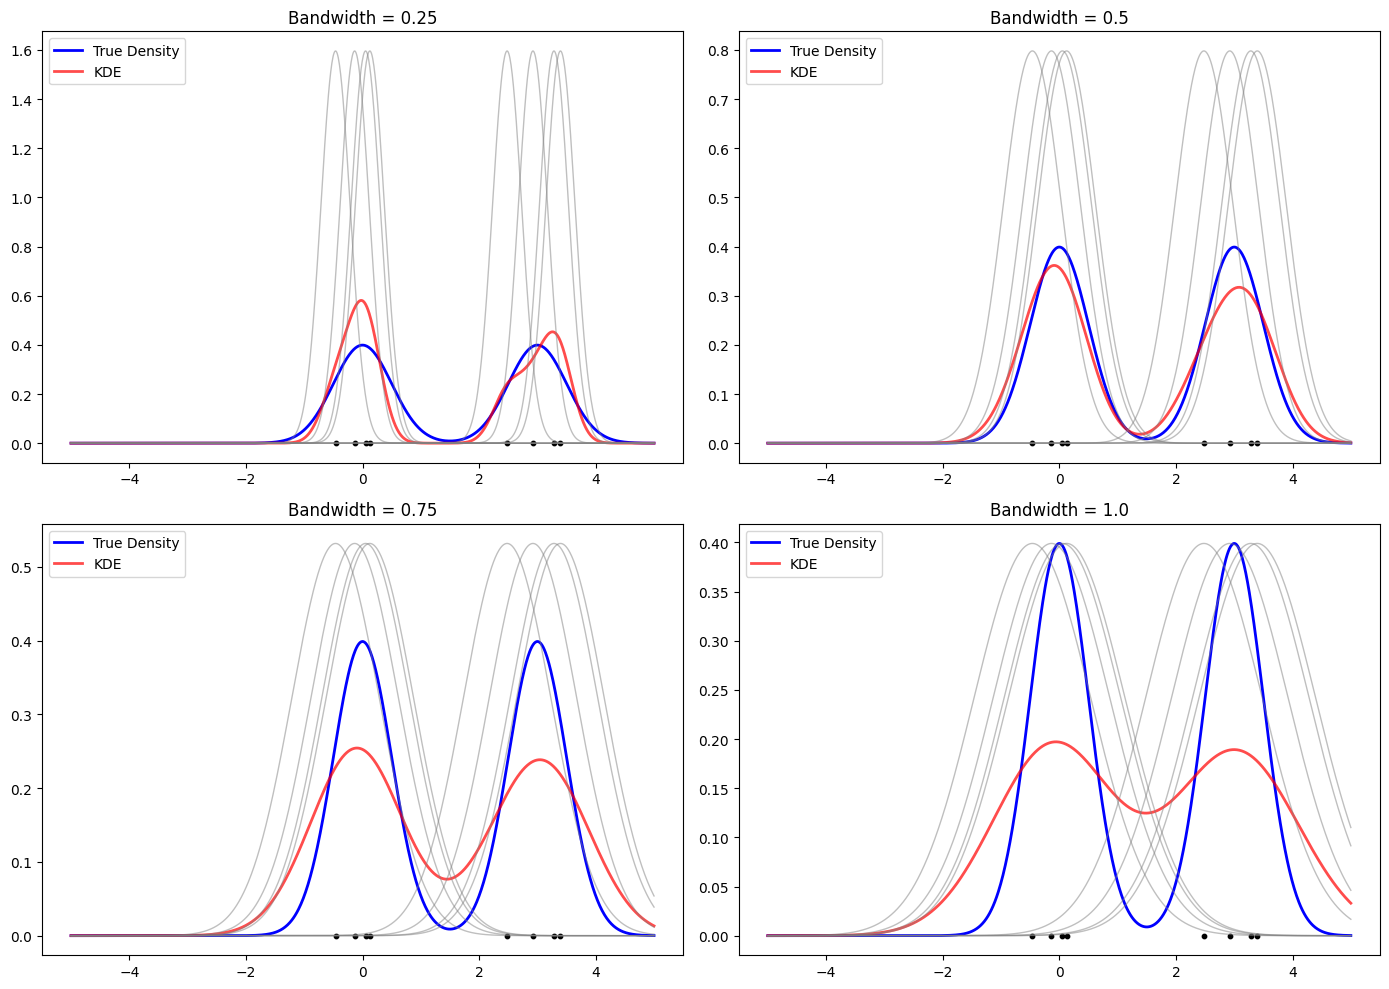

In [104]:
np.random.seed(41)

data_points = np.concatenate([np.random.normal(0, 0.5, 4),
                              np.random.normal(3, 0.5, 4)])
x_values = np.linspace(-5, 5, 1000)

true_density = 0.5*norm.pdf(x_values, 0, 0.5) + 0.5*norm.pdf(x_values, 3, 0.5)


fig, axs = plt.subplots(2, 2, figsize=(14, 10))
bandwidths = np.linspace(0.25, 1, 4)
axs = axs.flatten()

for i, bandwidth in enumerate(bandwidths):
    kde = np.sum([norm.pdf(x_values, point, bandwidth) for point in data_points], axis=0) / len(data_points)

    axs[i].plot(x_values, true_density, label='True Density', linewidth=2, color='blue')
    axs[i].plot(x_values, kde, 'r-', label='KDE', linewidth=2, color='red', alpha=0.7)

    for point in data_points:
        bump = norm.pdf(x_values, point, bandwidth)
        axs[i].plot(x_values, bump, color='gray', linewidth=1, alpha=0.5)

    axs[i].scatter(data_points, np.zeros(len(data_points)), color='k', s=10, alpha=1)
    axs[i].set_title(f'Bandwidth = {bandwidth}')
    axs[i].legend()

plt.tight_layout()
plt.savefig(os.path.join(plots_folder, 'bandwidth-kde.png'))
plt.show()

